![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

# #03 | Train Test Split for Model Selection

## Load the Data

- The goal of this dataset is
- To predict if **bank's customers** (rows) could have the approval for a credit card `target`
- Based on their **socio-demographical characteristics** (columns)

In [76]:
import pandas as pd #!

df_credit = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data',
                 na_values='?', header=None)

df_credit.rename(columns={15: 'target'}, inplace=True)
df_credit.target.replace({'+': 1, '-': 0}, inplace=True)
df_credit.columns = [str(i) for i in df_credit.columns]
df_credit

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


## Preprocess the Data

In [77]:
df_credit = df_credit.dropna();

In [78]:
df_credit = pd.get_dummies(data=df_credit, drop_first=True)

## Feature Selection

In [79]:
feature = df_credit.drop(columns='target')

In [80]:
target = df_credit.target

## Build & Compare Models

### `DecisionTreeClassifier()`

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
model_dt = DecisionTreeClassifier()

In [83]:
model_dt.fit(X=feature, y=target)

DecisionTreeClassifier()

In [85]:
from sklearn.tree import plot_tree

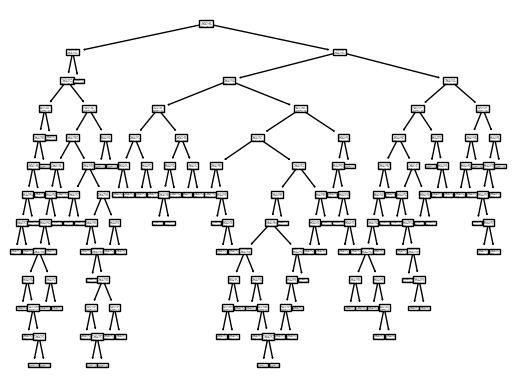

In [88]:

plot_tree(model_dt);

In [61]:
model_dt.predict(X=feature);

In [74]:
model_dt.score(X=feature, y=target)

0.9418070444104135

### `RandomForestClassifier()`

In [75]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X=feature, y=target)
model_rf.predict(X=feature);
model_rf.score(X=feature, y=target)

1.0

### `KNeighborsClassifier()`

In [71]:
from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier()
model_kn.fit(X=feature, y=target)
model_kn.predict(X=feature);
model_kn.score(X=feature, y=target)

0.7840735068912711

## Which Model is the Best?

## `train_test_split()` & Compare Again

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.33, random_state=42)

### `DecisionTreeClassifier()`

In [67]:
model_dt.fit(X=X_train, y=y_train)
model_dt.score(X=X_test, y=y_test)

0.8240740740740741

### `RandomForestClassifier()`

In [68]:
model_rf.fit(X=X_train, y=y_train)
model_rf.score(X=X_test, y=y_test)

0.8564814814814815

### `KNeighborsClassifier()`

In [73]:
model_kn.fit(X=X_train, y=y_train)
model_kn.score(X=X_test, y=y_test)

0.6666666666666666

## Which is the Best Model with `train_test_split()`?

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand the necessity to **create functions** to avoid the repetition of the code.
- [ ] **Bootstrapping** as a way to create an artificial dataset that helps to reduce the bias.
- [ ] **Classification threshold** to predict categories out of probabilities.
- [ ] Different ways to **compare classification models**.
- [ ] Understand the importance to check how good is a model with **data not seen during training**.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.